# VAT - visualising clustering tendency

In lectures 7 and 8 we discussed the VAT algorithm for visualising the clustering tendency of a dataset.   Below is python code for VAT.  You can treat it as a black box (not worrying about the internal coding details) - a function which can be used to execute VAT on an input dataset.


In [13]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
    
    #RV has already been reordered 
    
    
    
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




### Visualising iris datset using VAT

We will first recreate the visualisations of the iris dataset used in lectures (lecture 7).   Info about the iris dataset is [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).  First a heatmap of the raw iris dataset is displayed.  Secondly a randomly ordered dissimilarity matrix for the objects in iris is shown - notice the lack of structure.   Thirdly the VAT visualisation is produced.  The heatmap function from the seaborn package is employed as a convenient tool for plotting heatmaps.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform 

inputs = np.array([[i]for i in range(1, 11)])
d = pdist(inputs, 'euclidean')
print(squareform(d))
print(inputs)
len(d)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
 [3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
 [4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
 [5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
 [6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
 [7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
 [8. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
 [9. 8. 7. 6. 5. 4. 3. 2. 1. 0.]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


45

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


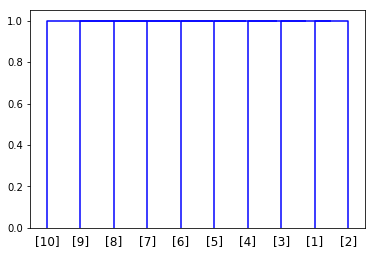

In [15]:
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

hc1 = linkage(d, 'single') #min
dendrogram(hc1, labels = inputs)
plt.show()


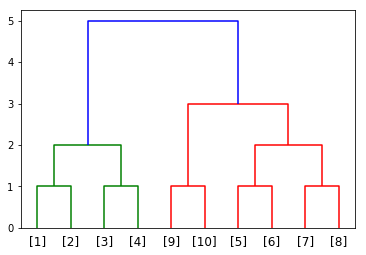

In [16]:
hc2 = linkage(d, 'average') #average
dendrogram(hc2, labels=inputs)
plt.show()

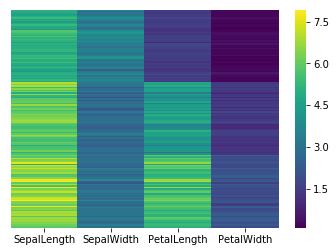

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


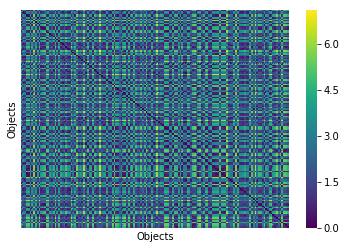

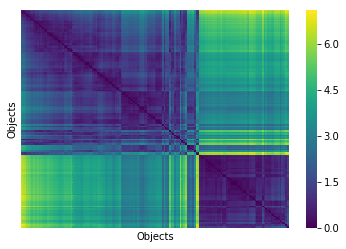

In [17]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()



####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().as_matrix()
np.random.shuffle(iris3)   ####randomise the order of rows (objects)
sq = squareform(pdist(iris3))   ###commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

### Question 4a)
How many clusters does the VAT visualisation reveal?   Is this what you were expecting given the wikipedia description of this dataset?


Answer 4a)


# Principal components analysis

Principal components analysis can be used for transforming data into a different (lower dimensional) representation.  This is particularly useful for visualisation.

The python sci-kit learn package (sklearn) contains functions which can be used for PCA.  Consider the example below of applying PCA on the iris dataset.


Variance explained by each PC [0.92461621 0.05301557]


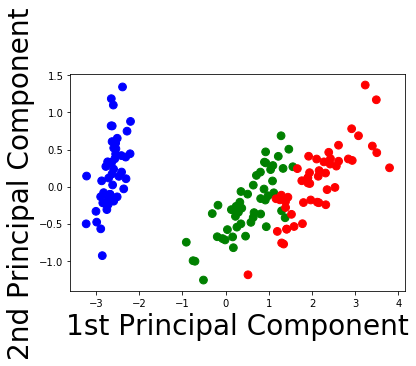

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA##########################################################
#######Example of performing PCA on Iris dataset and visualising####################
##########################################################


sklearn_pca = sklearnPCA(n_components=2)   #we want just the first two PCs
iris_sklearn = sklearn_pca.fit_transform(iris2)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   #print out the amount of variance explained by each PC

#set up the colour scheme
palette=palette = ['blue','green','red']
colors=iris.Name.replace(to_replace=iris.Name.unique(),value=palette).tolist()

#plot the objects along the first two principal components, using the colour scheme
plt.scatter(iris_sklearn[:,0],iris_sklearn[:,1],s=60,c=colors)   #plot the PC's in 2D
plt.xlabel('1st Principal Component', fontsize=28)
plt.ylabel('2nd Principal Component', fontsize=28)
plt.show()

### Question 4b)

Based on this visualisation - does it help with your answer to question 4a) ?

Answer 4b)


### Practicing VAT and PCA

You will now practice using the australian crabs dataset from [this file](australian-crabs.csv).   This data describes 200 crabs collected from Fremantle Western Australia.   There are two species of crabs - blue and orange.   Within each species there are male and female.   There are 5 features:

FL - frontal lip
RW - rear width
CL - carapace length
CW - carapace width
BD - body depth

The first four of these are visualised as follows:

<img src="crabsimage.png",width=300,height=300>

### Question 4c) 

Adapt the iris example to produce a VAT heatmap of the australian crabs dataset.   How many clusters are there?


AttributeError: Unknown property camp

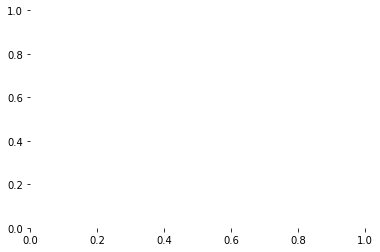

In [24]:
###Answer 4c
crabscall = pd.read_csv('australian-crabs.csv')
crabs = crabscall[['FL', 'RW','CL', 'CW', 'BD']]
crabs_std = crabs


RV, R, I = VAT(crabs_std)
x = sns.heatmap(RV, camp = 'viridis', xticklabels=False, yticklabels = False)
x.set(xlabel = "objects", ylabel = "Objects")
plt.show()



### Question 4d)

Using as input the 5 features 'FL','RW','CL','CW','BD' of the crabs, adapt the iris code above and determine the first and second principal components for the australian crabs data.  Print out the variance of each of these components.

Plot the crabs in 2D using the first two principal components.  Colour the crabs in violet/yellow/brown/black
<ul>
<li>violet=blue male crabs
<li>yellow= blue female crabs
<li>brown=orange male crabs
<li>black= orange female crabs
</ul>

In [28]:
####4d) answer
crabsall = pd.read_csv('australian-crabs.csv')
sklearn_pca = sklearnPCA(n_components = 2)
carbs_skleanr = sklearn_pca.fit_transform(crabs_std)
crabsall['label'] = crabsall["species"]+crabsall['sex']

platte = ['ciolet', 'yellow', 'brown', 'black']
colors = crabsall.label.rep



### Question 4e)
Based on your visualisation for the <em>australian crabs</em> dataset, speculate about the "meaning" of the first two
principal components.  What might each be measuring?

Answer 4e):

